In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pathlib import Path
from scipy import stats

import precision_functions as prefun

import importlib
importlib.reload(prefun)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Constants

In [3]:
EVENT = "rastoc:stillness-position-lost"
TRIAL_TAG = "validation-stimulus"  # Opcion: "fixation-stimulus"  # Es el momento donde aparece la cruz de fijacion
FIRST_SAMPLE = 500
MAX_VAR = 75
MAX_PLOTS = None
VERBOSE = False
ALL_FILES_RAW = list(Path("./raw_data").glob("*.csv"))
LOAD_PATH = "raw_data/gus_webcam3_computer3_chrome_ubuntu.csv"  # ·str(ALL_FILES_RAW[1])
LOAD_INFO = LOAD_PATH.split("/")[1].split("_")

### Data load

In [233]:
print(LOAD_PATH)
df = pd.read_csv(LOAD_PATH)
df.head(5)


raw_data/gus_webcam3_computer3_chrome_ubuntu.csv


,rt,response,trial_type,trial_index,time_elapsed,internal_node_id,run_id,condition,recorded_at,source_code_version,ip,user_agent,device,browser,browser_version,platform,platform_version,load_time,success,jspsych_start_time,item_width_mm,item_height_mm,item_width_px,px2mm,view_dist_mm,item_width_deg,px2deg,win_width_deg,win_height_deg,stimulus,response_type,key_press,avg_frame_time,center_x,center_y,rastoc-type,stimulus-coordinate,calibration-id,calibration-point-id,inner-width,inner-height,webgazer_data,webgazer_targets,session-id,validation-id,tracked-trial-id,trial-tag,start-x,start-y,events
0,18126.0,"{""name-id"":""prueba_a_conciencia"",""webcam-id"":""...",survey-html-form,0,18129,0.0-0.0,26,1,2023-01-24 16:58:28,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,webgazer-init-camera,1,47787,0.0-1.0,26,1,2023-01-24 16:58:28,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,fullscreen,2,50358,0.0-2.0,26,1,2023-01-24 16:58:28,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,events-tracking-start,3,50359,0.0-3.0,26,1,2023-01-24 16:58:28,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,NaN,NaN,2023-01-24T16:58:29.254Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52150.0,NaN,virtual-chinrest,4,102512,0.0-4.0,26,1,2023-01-24 16:58:28,8250564b3bfde663ef6456354891c013,157.92.27.254,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,WebKit,Chrome,107.0.0.0,Linux,NaN,NaN,NaN,NaN,85.6,53.98,348.0,4.07,589.69,8.302555,41.914808,45.8072,25.76655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check rastoc events

In [234]:
events  = prefun.get_rastoc_events(df, EVENT)
print("len(events):", len(events))

len(events): 24


### Precision experiment analysis

raw_data/juan_webcam8.csv
{"name-id":"Juan","webcam-id":"8","computer-id":"3","web-browser":"Chrome","operating-system":"Ubuntu"}
processing ...
len(horizontal_errors_pxs): 576
Error: 193.28 +- 99.35
Saved: analyzed/analyzed_juan_webcam8.csv
raw_data/juan_webcam3_computer3_chrome_ubuntu.csv
response is not a column of df
raw_data/gus_webcam8_computer3_chrome_ubuntu.csv
response is not a column of df
raw_data/gus_webcam9.csv
{"name-id":"Gustavo","webcam-id":"9","computer-id":"3","web-browser":"Chrome","operating-system":"Ubuntu"}
processing ...
len(horizontal_errors_pxs): 576
Error: 153.29 +- 79.14
Saved: analyzed/analyzed_gus_webcam9.csv
raw_data/gus_webcam4_computer_3_firefox_ubuntu.csv
response is not a column of df
raw_data/juan_webcam8_computer_3_chrome_ubuntu.csv
response is not a column of df
raw_data/juan_webcam9_computer3_chrome_ubuntu.csv
response is not a column of df
raw_data/juan_webcam9_repe.csv
{"name-id":"juan","webcam-id":"9","computer-id":"3","web-browser":"Crome/repet

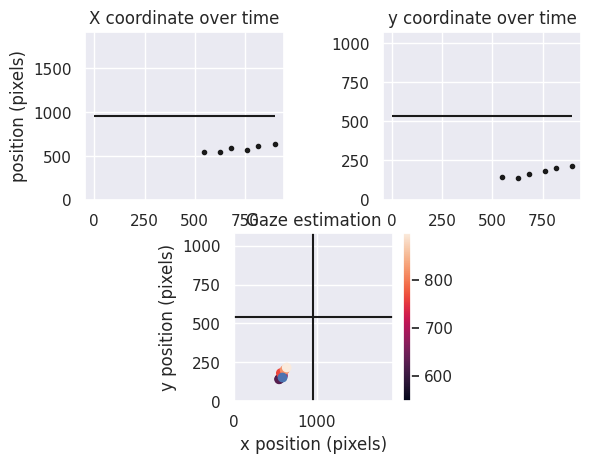

In [235]:

for file in ALL_FILES_RAW:
    LOAD_PATH = str(file)
    print(LOAD_PATH)
    df = pd.read_csv(LOAD_PATH)
    
    try:
        print(df['response'].iloc[0])
    except KeyError:
        print('response is not a column of df')
        continue

    df_res = prefun.calculate_and_plot_errors(df, 
                                    TRIAL_TAG,
                                    first_sample=FIRST_SAMPLE,
                                    max_var=MAX_VAR,
                                    max_plots=MAX_PLOTS, 
                                    verbose=VERBOSE)

                

    df_res.insert(0, 'abs', [i+1 for i in df_res.index])
    i = 1
    rounds = []
    for num in range(1, 577):
        rounds.append(i)
        if num % 72 == 0:
            i = i + 1
    df_res.insert(1, 'block', (df_res['trials']-1)%8 + 1)
    df_res.insert(2, 'round', rounds)
    df_res[['presented_point_x','presented_point_y']] = pd.DataFrame(df_res['presented_point'].tolist())
    points_position_dict = dict(zip(df_res['presented_point'].unique(), range(1,10)))
    df_res['target_id'] = df_res["presented_point"].map(points_position_dict)

    print(f"Error: {df_res['total_errors_pxs_mean'].mean():.2f} +- {df_res['total_errors_pxs_mean'].std():.2f}")
    SAVE_PATH = f"analyzed/analyzed_{LOAD_PATH.split('/')[-1]}"
    print(f'Saved: {SAVE_PATH}')
    df_res.to_csv(SAVE_PATH, index=False)

### SAVE

In [197]:
SAVE_PATH = f"analyzed/analyzed_{LOAD_PATH.split('/')[-1]}"
print(f'Saved: {SAVE_PATH}')
df_res.to_csv(SAVE_PATH, index=False)

Saved: analyzed/analyzed_gus_local_webcam4_computer3_chrome_ubuntu.csv


### Analysis

In [ ]:
df_res_juan = pd.read_csv('./analyzed/analyzed_juan_webcam4.csv')
df_res_gus = pd.read_csv('./analyzed/analyzed_gus_webcam4.csv')

df_res_all = [df_res_gus,  df_res_juan]

new_indexes = []

for i, df_res_ in enumerate(df_res_all):
    cols = []
    for i in sorted(df_res_['presented_point_x'].unique()):
        col = []
        for j in sorted(df_res_['presented_point_y'].unique(), reverse=True):
            col.append((i, j))
        cols.append(col)

    new_index_ = np.concatenate(pd.DataFrame(cols).T.values)
    new_index_ = [str(i) for i in new_index_]
    new_indexes.append(new_index_)

In [ ]:
sns.set(font_scale=1)   

columnas = ["horizontal_errors_pxs_mean", "vertical_errors_pxs_mean"]
VMIN = 0
VMAX = 400
CMAP = "Reds"

iterator = 0
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(1, 4, figure=fig)
for i, df_res_ in enumerate(df_res_all):
    for j in range(2):
        ax1 = fig.add_subplot(gs[0, iterator])
        iterator +=1
        sns.heatmap(
            df_res_.groupby("presented_point")[columnas[j]]
            .mean()
            .reindex(new_indexes[i])
            .values.reshape(3, 3),
            square=True,
            cbar=False,
            cmap=CMAP,
            # annot=True,
            xticklabels=False,
            yticklabels=False,
            ax=ax1,
            vmin=VMIN,
            vmax=VMAX,
        )
        # for t in ax1.texts:
        #     t.set_text("●")



img = plt.imshow(np.array([[VMIN, VMAX + 1]]), cmap=CMAP)
cax = plt.axes([0.1, 0.35, 0.7, 0.2])
plt.gca().set_visible(False)
plt.colorbar(ax=cax, orientation='horizontal')

fig.subplots_adjust(right=0.75)
# plt.colorbar(ax=ax1, cax=cax,)
plt.show()


In [ ]:
# df_res = pd.read_csv('./analyzed/analyzed_juan_webcam9.csv')
df_res = pd.read_csv('./analyzed/analyzed_gus_webcam9_computer3_chrome_ubuntu.csv')

plt.figure(figsize=(14, 6))
sns.set(font_scale=3.5)   

g = sns.lmplot(data=df_res, y='horizontal_errors_pxs_mean', x="abs", hue='round',height=10, aspect=3, palette='flare',legend=False)
plt.vlines([i*72 for i in range(1,8)], ymin=0 , ymax=600, colors='k')
plt.xlim([0, 579])
plt.ylim([0, 600])
plt.xlabel('Presented point on screen')
plt.ylabel('Horizontal error (pixels)')
plt.title('Horizontal error')
plt.savefig(f"horizontal_error_{eval(df_res['metadata'].iloc[0])['name-id']}_webcam{eval(df_res['metadata'].iloc[0])['webcam-id']}.png")
plt.show()

sns.lmplot(data=df_res, y='vertical_errors_pxs_mean', x="abs", hue='round',height=10, aspect=3, palette='flare',legend=False)
plt.vlines([i*72 for i in range(1,8)], ymin=0 , ymax=600, colors='k')
plt.xlabel('Presented point on screen')
plt.ylabel('Vertical error (pixels)')
plt.title('Vertical error')
plt.xlim([0, 579])
plt.ylim([0, 600])
plt.savefig(f"vertical_error_{eval(df_res['metadata'].iloc[0])['name-id']}_webcam{eval(df_res['metadata'].iloc[0])['webcam-id']}.png")
plt.show()

sns.lmplot(data=df_res, y='total_errors_pxs_mean', x="abs", hue='round',height=10, aspect=3, palette='flare',legend=False)
plt.vlines([i*72 for i in range(1,8)], ymin=0 , ymax=600, colors='k')
plt.xlabel('Presented point on screen')
plt.ylabel('Total error (pixels)')
plt.title('Total error')
plt.xlim([0, 579])
plt.ylim([0, 600])
plt.show()

### Other

In [ ]:
df_res_ = df_res[['abs', 'block', 'round','target_id', 'horizontal_errors_pxs', 'vertical_errors_pxs', 'total_errors_pxs']]

In [ ]:
df_res['horizontal_errors_pxs_mean_norm'] = df_res['horizontal_errors_pxs_mean'] / df_res['horizontal_errors_pxs_mean'].max()
df_res['vertical_errors_pxs_mean_norm'] = df_res['vertical_errors_pxs_mean'] / df_res['vertical_errors_pxs_mean'].max()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_res['abs'],df_res['horizontal_errors_pxs_mean'])

slope


### Analysis

In [4]:
ALL_FILES_ANALYZED = list(Path("./analyzed").glob("*.csv"))
ALL_FILES_ANALYZED

df_all_res = prefun.evaluate_experiment_instances(ALL_FILES_ANALYZED)


analyzed/analyzed_juan_webcam9_computer3_ubuntu.csv
Error x: 97.52 +- 67.40
Error y: 126.23 +- 108.76
Error total: 175.64 +- 112.13
Sampling rate: 23.30 +- 2.08
px2degree: 41.81
---
analyzed/analyzed_gus_webcam_3.csv
px2degree not in df
analyzed/analyzed_juan_local_webcam4_computer3_chrome_ubuntu.csv
px2degree not in df
analyzed/analyzed_juan_webcam4.csv
Error x: 115.75 +- 93.67
Error y: 143.29 +- 134.85
Error total: 204.16 +- 143.68
Sampling rate: 22.76 +- 2.09
px2degree: 35.66
---
analyzed/analyzed_juan_webcam8_computer3_chrome_ubuntu.csv
Error x: 114.28 +- 72.31
Error y: 132.81 +- 97.61
Error total: 193.28 +- 99.35
Sampling rate: 22.59 +- 2.40
px2degree: 38.12
---
analyzed/analyzed_juan_webcam3.csv
Error x: 151.99 +- 111.98
Error y: 170.34 +- 143.36
Error total: 252.42 +- 153.45
Sampling rate: 25.20 +- 2.18
px2degree: 40.88
---
analyzed/analyzed_juan_webcam9_repe.csv
Error x: 97.52 +- 67.40
Error y: 126.23 +- 108.76
Error total: 175.64 +- 112.13
Sampling rate: 23.30 +- 2.08
px2degre

In [220]:
ALL_FILES_ANALYZED

[PosixPath('analyzed/analyzed_gus_webcam9_computer3_chrome_ubuntu.csv'),
 PosixPath('analyzed/analyzed_juan_repeticion_webcam9_computer3_chrome_ubuntu.csv'),
 PosixPath('analyzed/analyzed_juan_webcam8_computer3_chrome_ubuntu.csv'),
 PosixPath('analyzed/analyzed_juan_webcam3.csv'),
 PosixPath('analyzed/analyzed_juan_webcam8.csv'),
 PosixPath('analyzed/analyzed_gus_webcam_3.csv'),
 PosixPath('analyzed/analyzed_gus_webcam8.csv'),
 PosixPath('analyzed/analyzed_juan_webcam4.csv'),
 PosixPath('analyzed/analyzed_gus_webcam9.csv'),
 PosixPath('analyzed/gus_webcam4_computer_3_chrome_ubuntu.csv'),
 PosixPath('analyzed/analyzed_gus_local_webcam4_computer3_chrome_ubuntu.csv'),
 PosixPath('analyzed/analyzed_juan_webcam9_repe.csv'),
 PosixPath('analyzed/analyzed_juan_local_webcam4.csv'),
 PosixPath('analyzed/analyzed_juan_webcam9.csv'),
 PosixPath('analyzed/analyzed_juan_webcam9_computer3_ubuntu.csv'),
 PosixPath('analyzed/analyzed_gus_webcam4.csv'),
 PosixPath('analyzed/analyzed_gus_webcam8_compute

### Save

In [ ]:
SAVE_PATH = f"analyzed/analyzed_{LOAD_PATH.split('/')[-1]}"
print(f'Saved: {SAVE_PATH}')
df_res.to_csv(SAVE_PATH, index=False)

### Cosas

In [ ]:

df = pd.read_csv('/home/gus/Downloads/antisacadas_91.csv')
df.head(5)

In [ ]:
trial = 100
xs = [i['x'] for i in df[~df['webgazer_data'].isna()]['webgazer_data'].map(eval).iloc[trial]]
ys = [i['y'] for i in df[~df['webgazer_data'].isna()]['webgazer_data'].map(eval).iloc[trial]]
ts = [i['t'] for i in df[~df['webgazer_data'].isna()]['webgazer_data'].map(eval).iloc[trial]]

plt.plot(ts, xs)
# plt.xlim(0, int(df[~df['webgazer_data'].isna()]['viewportWidth'].iloc[-1]))
# plt.ylim(0, df[~df['webgazer_data'].isna()]['viewportHeight'].iloc[-1])
# plt.colorbar()
plt.show()